![title](wcar.png)
# Interaction Partners for PIG-H
    Zhe Ji, Michele Tinti and Michael A.J. Ferguson

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee


In [1]:
#reload when modified
%load_ext autoreload
%autoreload 2

In [2]:
#set up code
%run imports.py 

In [3]:
import utilities
pd.set_option('max_colwidth', 12)

In [4]:
#create a description dictionary
#prot_id -> desc
path_to_file = 'TriTrypDB-41_TbruceiTREU927_AnnotatedProteins_plusVSG.fasta'
desc_dict = utilities.make_desc_dict(path_to_file)

In [5]:
df = pd.read_csv('data_iris_limma.csv.gz',index_col=[0])
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,edgeR_logCPM,edgeR_PValue,edgeR_FDR,edgeR_log10_PValue,limma_Acc,limma_PValue,limma_FDR,limma_candidate,limma_log10FDR,limma_log10PValue
155,Tb05.5K5...,Tb05.5K5...,97;97;55,97;97;55,97;97;55,Tb05.5K5...,3,97,97,97,...,12.752955,0.812829,1.0,0.090001,155,0.173880,0.567426,no,0.246091,0.759750
156,Tb927.5....,Tb927.5....,6;6,6;6,6;6,Tb927.5....,2,6,6,6,...,7.146750,1.000000,1.0,-0.000000,156,0.553512,0.753821,no,0.122732,0.256873
157,Tb927.5....,Tb927.5....,12;12,12;12,12;12,Tb927.5....,2,12,12,12,...,8.801039,1.000000,1.0,-0.000000,157,0.779904,0.893589,no,0.048862,0.107959
158,Tb927.5....,Tb927.5....,119;119,119;119,119;119,Tb927.5....,2,119,119,119,...,11.972702,0.901682,1.0,0.044947,158,0.356883,0.642493,no,0.192131,0.447474
159,Tb927.5....,Tb927.5....,18;18;18,18;18;18,18;18;18,Tb927.5....,3,18,18,18,...,9.198063,0.562645,1.0,0.249765,159,0.057613,0.533021,no,0.273256,1.239478


236    phosphat...
360    N-acetyl...
439          KREL2
506    PIG-P, p...
551    EF-hand ...
Name: desc, dtype: object
20
20


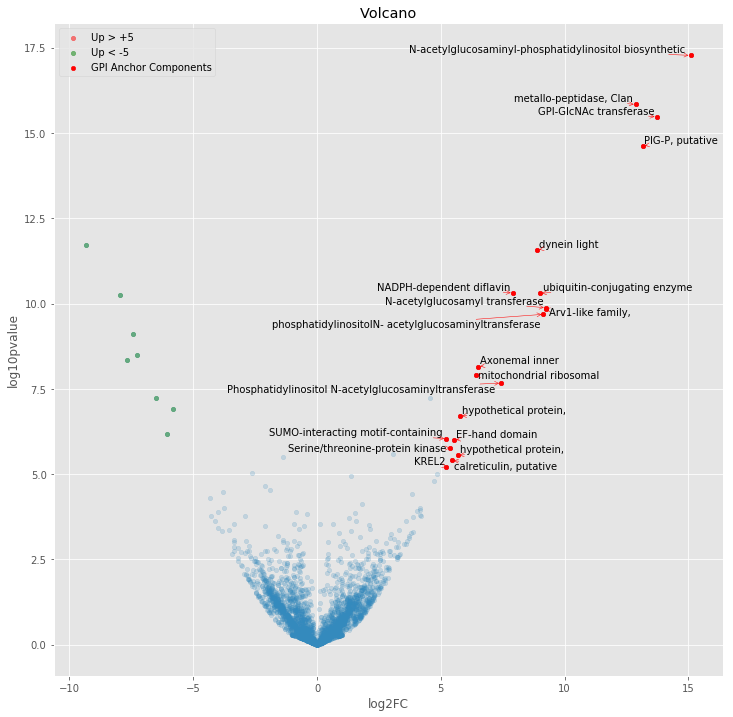

In [6]:
fig, ax=plt.subplots(figsize=(12,12), 
                     ncols=1, nrows=1)

ids = df[df['log2FC']>5]
print(ids['desc'].head())
_ids = ids.index.values
_names = [' '.join( n.split(' ')[0:2]) for n in ids['desc']]
print(len(_ids))
print(len(_names))



utilities.make_vulcano(df, ax, x='log2FC', y='log10pvalue', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano',
             fc_limit=5,
             fc_col='log2FC'
            )
#fig.savefig('vulcano.eps')

In [7]:
df.sort_values('log2FC',ascending=False)[['Gene_id','desc','log2FC']].head()

,Gene_id,desc,log2FC
360,Tb11.v5....,N-acetyl...,15.084654
2653,Tb927.5....,GPI-GlcN...,13.713447
506,Tb927.10...,"PIG-P, p...",13.161237
3678,Tb927.9....,metallo-...,12.873088
2229,Tb927.3....,N-acetyl...,9.239462


In [8]:
naming_dict={
'Tb11.v5.0765': 'TbPIGA',
'Tb927.5.3680': 'TbPIGH',
'Tb927.10.10110': 'TbPIGP',
'Tb927.10.6140': 'TbPIGC',
'Tb927.3.4570': 'TbPIGQ',
'Tb927.4.780': 'TbPIGY',
'Tb927.10.4610': 'DPM1',
'Tb927.9.6440': 'DPM2'}
ids = df[df.Gene_id.isin(naming_dict.keys())]
print(ids['desc'].head())
_ids = ids.index.values
_names = [naming_dict[n] for n in ids['Gene_id'] ]
print(len(_ids))
print(len(_names))

236     phosphat...
360     N-acetyl...
506     PIG-P, p...
922     dolichol...
2229    N-acetyl...
Name: desc, dtype: object
8
8


No handles with labels found to put in legend.
No handles with labels found to put in legend.


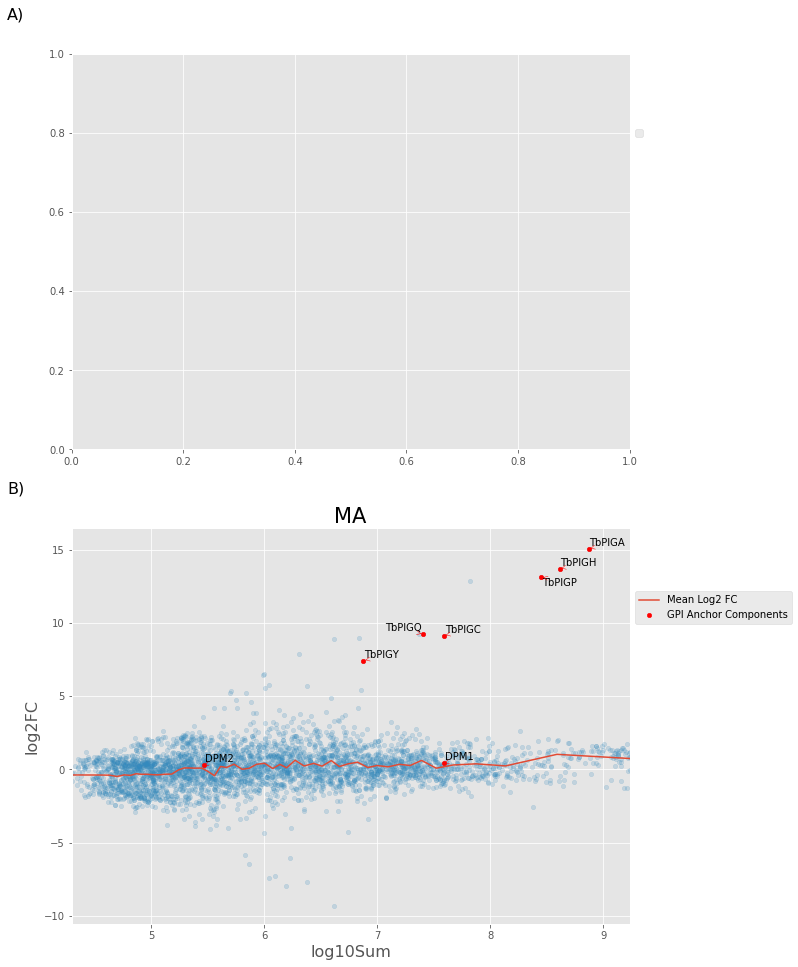

In [9]:
fig, axes=plt.subplots(figsize=(10,16), ncols=1, nrows=2)



'''

utilities.make_vulcano(df, axes[0], 
                       x='log2FC', y='log10pvalue', 
             annot_index=_ids,
             annot_names = _names,
             title='Vulcano',
             fc_limit=False,
             fc_col='log2FC'
            )

'''

utilities.make_vulcano(df, axes[1], 
                       x='log10Sum', y='log2FC', 
             annot_index=_ids,
             annot_names = _names,
             title='MA',
              fc_col = 'log2FC',
                fc_limit=False,
            )
#axes[1].plot()
df.groupby('Log10signal_Q')[['log10Sum',
                             'log2FC']].mean().plot(ax=axes[1],
                                                    x='log10Sum',
                                                    y='log2FC',
                                                    label='Mean Log2 FC')

#axes[1].set_xlim(data_irs['log10Sum'].min()-data_irs['log10Sum'].min()*0.01,
#                 data_irs['log10Sum'].max()+data_irs['log10Sum'].min()*0.01)


axes[0].title.set_size(21)
axes[1].title.set_size(21)
axes[0].yaxis.label.set_size(16)
axes[0].xaxis.label.set_size(16)
axes[1].yaxis.label.set_size(16)
axes[1].xaxis.label.set_size(16)
axes[0].text(-0.1, 1.1, 'A)', horizontalalignment='center', 
               verticalalignment='center',
               transform=axes[0].transAxes,fontsize=16)

axes[1].text(-0.1, 1.1, 'B)', horizontalalignment='center', 
               verticalalignment='center',
               transform=axes[1].transAxes,fontsize=16)
#plt.tight_layout()
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.8))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.savefig(os.path.join('test_2.png'))
plt.savefig(os.path.join('test_2.svg'))
plt.show()

In [10]:
ml_df=pd.read_csv('D:/michele/final_df.gz',index_col=[0])

In [11]:
ml_df['genes'] = [utilities.clean_id(n) for n in ml_df['Gene ID']]

In [12]:
#ml_df[ml_df['genes'].isin(naming_dict.keys())]
aboundance_df = ml_df[['genes','EF_Abundance_BSF','EF_Abundance_PCF']]
aboundance_df.set_index('genes',inplace=True)
aboundance_df.head()

,EF_Abundance_BSF,EF_Abundance_PCF
genes,,
Tb04.24M18.150,5.870638,7.631146
Tb04.3I12.100,NaN,NaN
Tb05.30F7.410,NaN,NaN
Tb05.5K5.10,7.606765,7.829130
Tb05.5K5.100,6.758570,7.772564


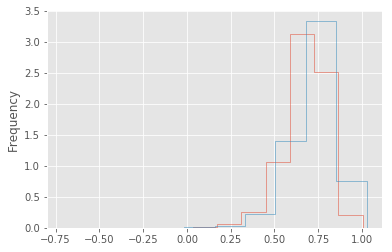

In [13]:
for n in aboundance_df.columns:
    aboundance_df[n]=utilities.replace_nan(aboundance_df[n])  

fig, ax = plt.subplots()
for n in aboundance_df.columns:
    aboundance_df[n] = utilities.impute(aboundance_df[n],ax=ax)

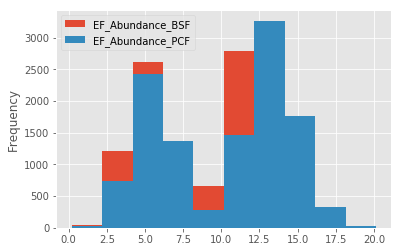

In [14]:
aboundance_df.plot(kind='hist')

aboundance_df[['BSF_rank','PCF_rank']]=aboundance_df.rank(ascending =False) 
df['gene_id']=[utilities.clean_id(n) for n in df['Protein IDs']]
df.set_index('gene_id', inplace=True)
df = df.join(aboundance_df,how='left')
df.head()
df['baint_intensity']= df[['Intensity Bait_1','Intensity Bait_2','Intensity Bait_3']].mean(axis=1)
df['rank_fc'] = np.log2(df['baint_intensity']/df['BSF_rank'])

gene_id
Tb927.10.6140     phosphat...
Tb11.v5.0765      N-acetyl...
Tb927.1.3030            KREL2
Tb927.10.10110    PIG-P, p...
Tb927.10.11330    EF-hand ...
Name: desc, dtype: object
20
20


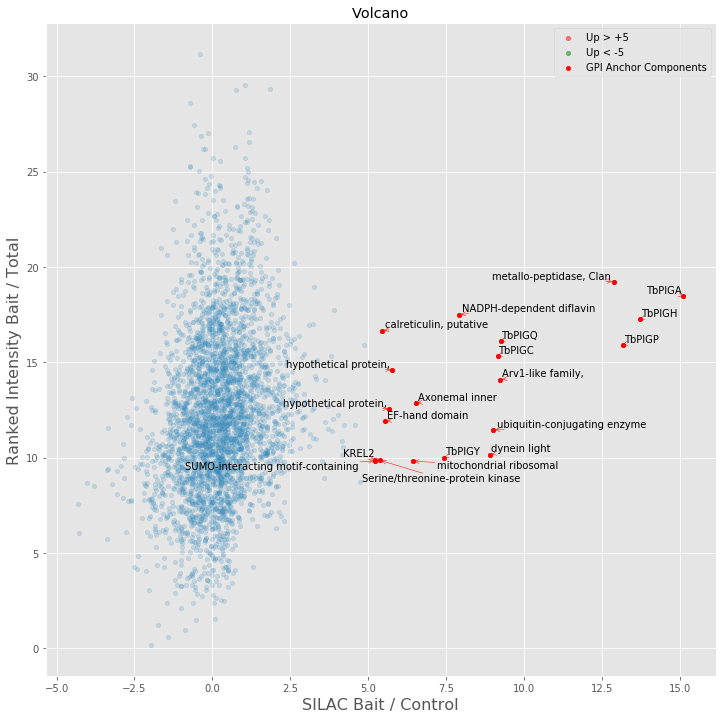

In [20]:
fig, ax=plt.subplots(figsize=(12,12), 
                     ncols=1, nrows=1)

ids = df[(df['log2FC']>5)&(df['rank_fc']>9)]
print(ids['desc'].head())
_ids = ids.index.values
_names = [' '.join( n.split(' ')[0:2]) for n in ids['desc']]
_names = [naming_dict[n[0]] if n[0] in naming_dict else ' '.join( n[1].split(' ')[0:2]).strip() for n in zip(ids['Gene_id'],ids['desc']) ]
print(len(_ids))
print(len(_names))



utilities.make_vulcano(df, ax, x='log2FC', y='rank_fc', 
             annot_index=_ids,
             annot_names = _names,
             title='Volcano',
             fc_limit=5,
             fc_col='log2FC'
            )
plt.xlabel('SILAC Bait / Control',fontsize=16)
plt.ylabel('Ranked Intensity Bait / Total',fontsize=16)
plt.savefig(os.path.join('test_3.png'))
plt.savefig(os.path.join('test_3.svg'))

In [16]:
#list(df.columns)